### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score , StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.feature_selection import mutual_info_classif
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from imblearn.combine import SMOTETomek
import xgboost as xgb




In [3]:
df = pd.read_csv('synthetic_neonatal_data.csv')



### Dataset Description:

The dataset contains **100,000** records with **67 columns**, covering a wide range of maternal, neonatal, and clinical parameters. Here is a breakdown:

1. **Maternal Information:**
   - `Maternal_Age`, `Parity`, `Gravidity`, `Antenatal_Visits`
   - `Maternal_Hypertension`, `Maternal_Diabetes`, `Maternal_Infection`
   - `Antenatal_Steroids`, `Maternal_Smoking`, `Chorioamnionitis`

2. **Neonatal Information:**
   - `Gestational_Age`, `Birth_Weight`
   - `Mode_of_Delivery`, `Fetal_Presentation`
   - `Apgar_1min`, `Apgar_5min`, `Cord_pH`
   - `Newborn_Sex`

3. **Initial Neonatal Vitals:**
   - `Temperature`, `Heart_Rate`, `Respiratory_Rate`
   - `Blood_Pressure`, `SpO2`
   - `Resuscitation`, `Respiratory_Support`

4. **Clinical Indicators:**
   - `Neuro_Exam_Score`, `Respiratory_Distress_Signs`
   - `FiO2`, `Blood_Gas_pH`, `Blood_Gas_pCO2`, `Blood_Gas_pO2`
   - `Bicarbonate`, `Chest_Xray`

5. **Laboratory Results:**
   - `Total_Bilirubin`, `Direct_Bilirubin`, `Indirect_Bilirubin`
   - `Hemoglobin`, `WBC`, `Platelets`
   - `CRP`, `Procalcitonin`, `Blood_Glucose`
   - `Sodium`, `Potassium`, `Calcium`, `Lactate`, `Ammonia`
   - `AST`, `ALT`

6. **Advanced Diagnostic Tests:**
   - `Cranial_Ultrasound`, `Echocardiography`
   - `Surfactant_Administered`, `Blood_Culture`
   - `Metabolic_Screening`, `Genetic_Screening`

7. **Fluid Management:**
   - `Fluid_Intake`, `Fluid_Output`, `Weight_Loss_Percent`
   - `Dehydration_Signs`

8. **Critical Conditions & Interventions:**
   - `Seizure_Activity`, `Temperature_Instability`
   - `Clinical_Interventions`, `Response_to_Treatment`

9. **Target Variable:**
   - `Predicted_Disease`: A categorical variable with **9 distinct neonatal conditions**, including:
     - Birth Asphyxia, Low Birth Weight, Respiratory Distress, Infections, etc.

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Shape: (100000, 67)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 67 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Maternal_Age                100000 non-null  int64  
 1   Parity                      100000 non-null  int64  
 2   Gravidity                   100000 non-null  int64  
 3   Antenatal_Visits            100000 non-null  int64  
 4   Maternal_Hypertension       100000 non-null  int64  
 5   Maternal_Diabetes           100000 non-null  int64  
 6   Maternal_Infection          100000 non-null  int64  
 7   Antenatal_Steroids          100000 non-null  int64  
 8   Maternal_Smoking            100000 non-null  int64  
 9   Chorioamnionitis            100000 non-null  int64  
 10  Gestational_Age             100000 non-null  int64  
 11  Birth_Weight                100000 non-null  int64  
 12  Mode_of_Delivery            10

In [5]:
print("\nDataset Head:")
print(df.head())

# 2.3: Get a statistical summary for numerical columns.
print("\nStatistical Summary for Numeric Columns:")
print(df.describe())



Dataset Head:
   Maternal_Age  Parity  Gravidity  Antenatal_Visits  Maternal_Hypertension  \
0            32       3          6                 8                      0   
1            34       1          2                 3                      1   
2            29       4          7                 5                      1   
3            28       2          5                 9                      0   
4            23       0          3                 7                      0   

   Maternal_Diabetes  Maternal_Infection  Antenatal_Steroids  \
0                  0                   0                   1   
1                  0                   1                   1   
2                  0                   0                   0   
3                  1                   1                   1   
4                  1                   1                   1   

   Maternal_Smoking  Chorioamnionitis  ...  Genetic_Screening  Fluid_Intake  \
0                 1                 1  ...    

In [6]:
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values[missing_values > 0])  # Display columns that have missing values

num_duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", num_duplicates)
if num_duplicates > 0:
    df = df.drop_duplicates()  # Remove duplicates if they exist
    print("Duplicates removed. New dataset shape:", df.shape)


Missing Values per Column:
Respiratory_Support       27865
Clinical_Interventions    20193
dtype: int64

Number of Duplicate Rows: 0


### **Blood Glucose Levels Across Neonatal Conditions**  

C:\Users\DELL8\AppData\Local\Temp\ipykernel_124048\2567577470.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Predicted_Disease'], y=df['Blood_Glucose'], ci=None)


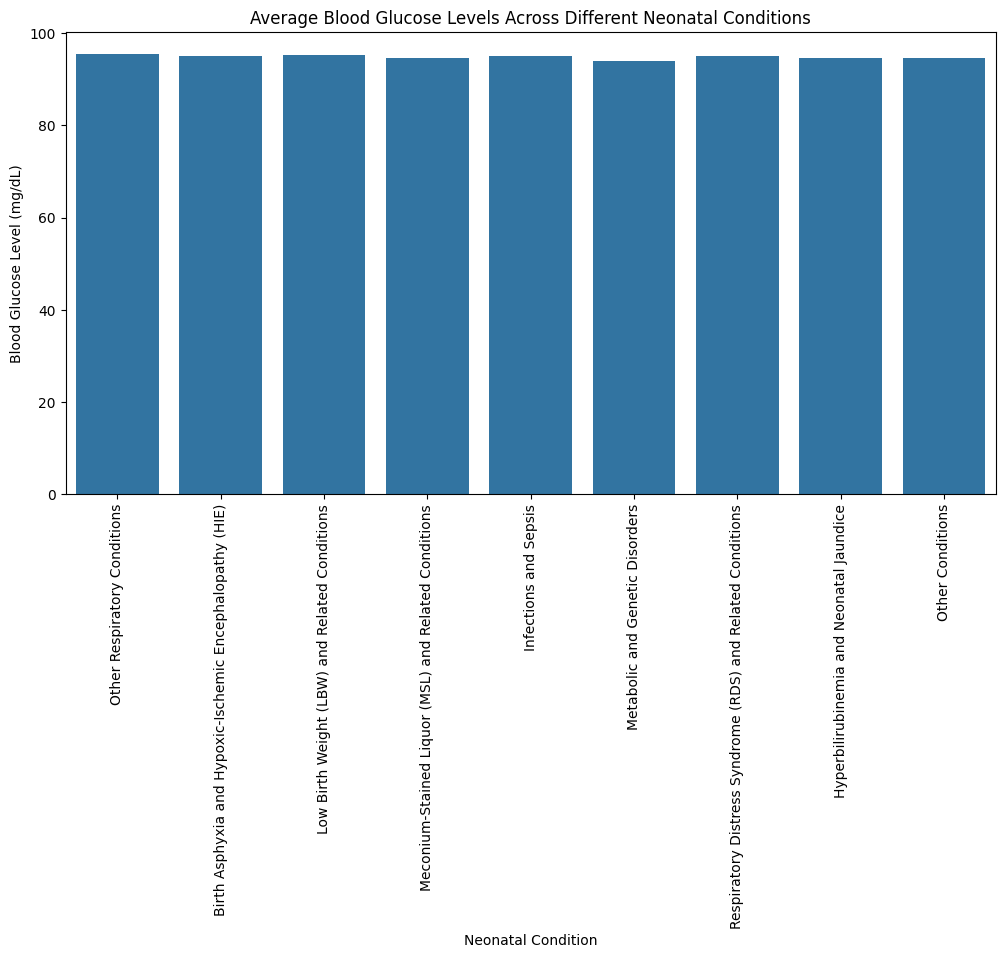

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Predicted_Disease'], y=df['Blood_Glucose'], ci=None)
plt.xticks(rotation=90)
plt.title('Average Blood Glucose Levels Across Different Neonatal Conditions')
plt.xlabel('Neonatal Condition')
plt.ylabel('Blood Glucose Level (mg/dL)')
plt.show()




#### **Observation:**  
The bar plot illustrates the **average blood glucose levels** for different **neonatal conditions**. Certain conditions show **higher or lower glucose levels**, indicating potential metabolic imbalances. Conditions like **hypoglycemia** are expected to have lower glucose levels, whereas infections or stress-related conditions may show elevated levels.  

#### **Conclusion:**  
This analysis highlights how blood glucose levels **vary across neonatal diseases**, which can be **useful for early diagnosis and intervention**. Monitoring glucose levels in newborns can help detect and manage **critical conditions** more effectively, ensuring timely medical care.

### **CRP Levels Across Different Neonatal Conditions**

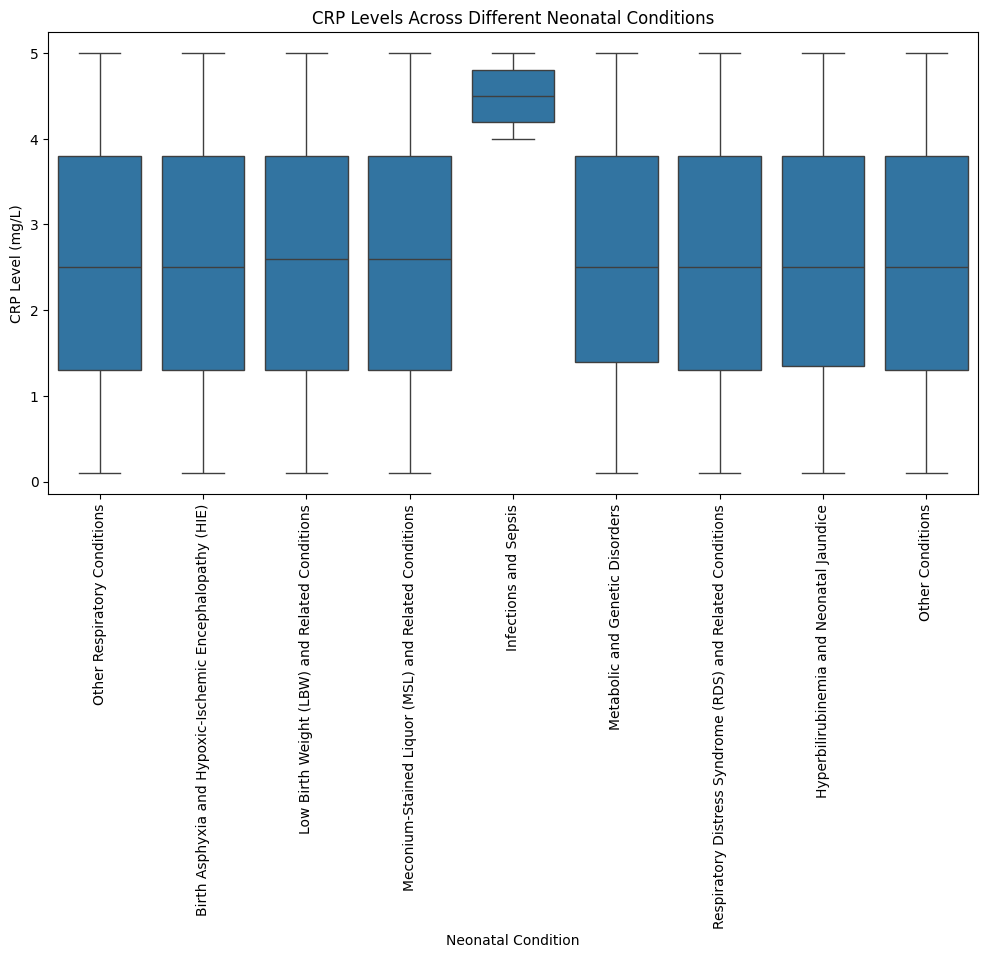

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Predicted_Disease'], y=df['CRP'])
plt.xticks(rotation=90)
plt.title('CRP Levels Across Different Neonatal Conditions')
plt.xlabel('Neonatal Condition')
plt.ylabel('CRP Level (mg/L)')
plt.show()


  

#### **Observation:**  
The box plot displays **C-reactive protein (CRP) levels** across various **neonatal conditions**. CRP is a key inflammatory marker, and its levels vary significantly among different diseases. Some conditions exhibit **higher CRP levels**, indicating an active inflammatory response, while others show **lower or normal CRP levels**. The presence of outliers suggests that certain cases may have **extreme inflammation**.  

#### **Conclusion:**  
This analysis emphasizes the role of **CRP as a diagnostic biomarker** for neonatal infections and inflammatory conditions. Higher CRP levels in certain diseases can help in **early detection and treatment** of neonatal **sepsis, infections, or inflammatory disorders**, improving clinical outcomes.

### **Distribution of Predicted Neonatal Diseases**  

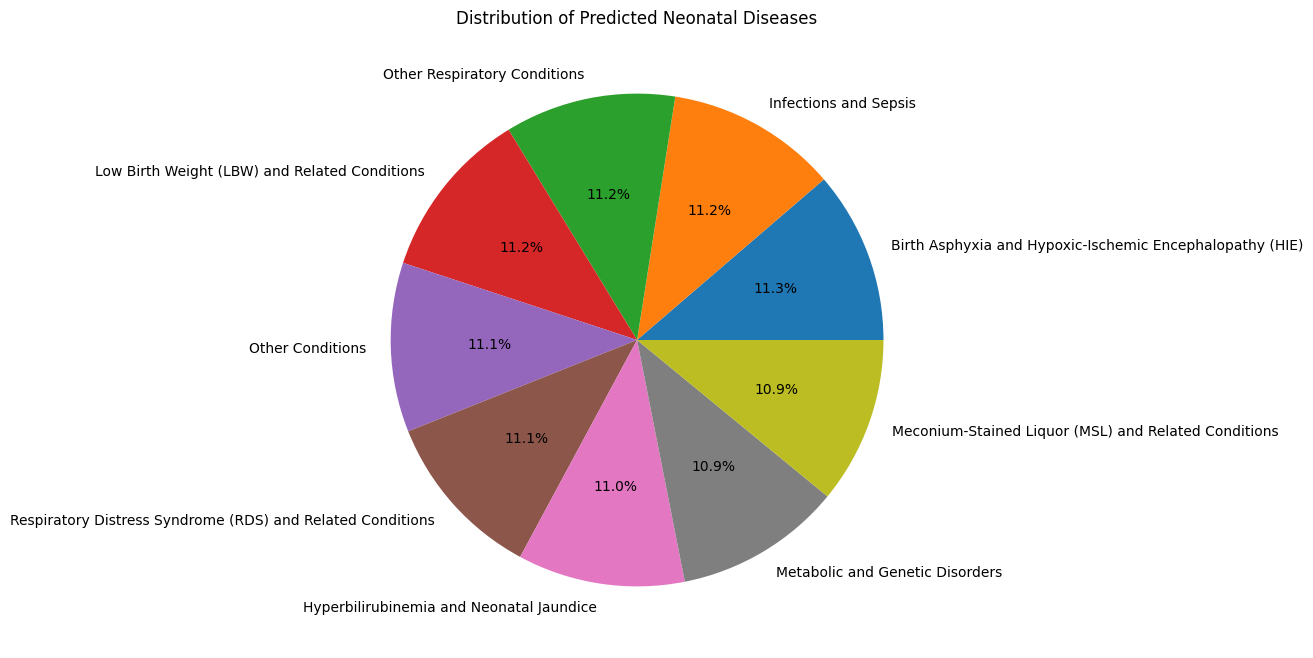

In [9]:
df['Predicted_Disease'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Predicted Neonatal Diseases')
plt.ylabel('')
plt.show()




#### **Observation:**  
The pie chart illustrates the **proportion of different neonatal diseases** predicted in the dataset. Some conditions appear more frequently, while others are less common. The chart helps in understanding the **prevalence of specific diseases**, identifying which neonatal conditions occur most frequently.  

#### **Conclusion:**  
This visualization is useful for **clinical decision-making and resource allocation** in neonatal care. By identifying the most common diseases, healthcare professionals can **prioritize early detection, treatment strategies, and preventive measures** for neonatal health management.

### **Distribution of Birth Weight**

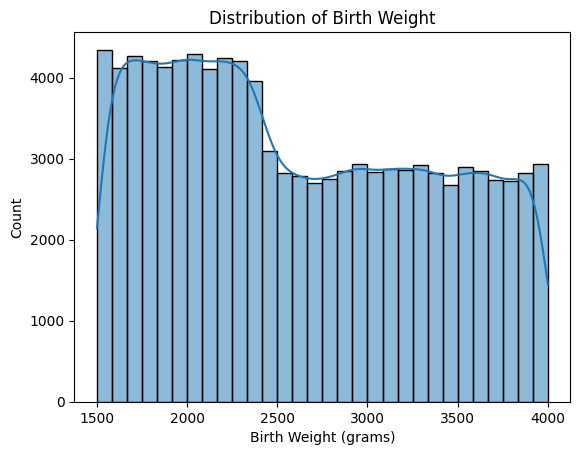

In [21]:
sns.histplot(df['Birth_Weight'], bins=30, kde=True)
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (grams)')
plt.ylabel('Count')
plt.show()


  

#### **Observation:**  
The histogram illustrates the **distribution of birth weights** among newborns in the dataset. The **majority of birth weights** fall within a specific range, with some cases of **low birth weight (LBW) and high birth weight (macrosomia)**. The **KDE curve** helps visualize the overall shape of the distribution, showing whether it is **normally distributed or skewed**.  

#### **Conclusion:**  
Understanding birth weight distribution is **crucial for neonatal health assessment**. Low birth weight may indicate **prematurity or growth restrictions**, while high birth weight could be associated with **maternal diabetes or delivery complications**. This analysis helps in **identifying at-risk newborns** for better clinical care and intervention.

### **Distribution of Blood Pressure**  

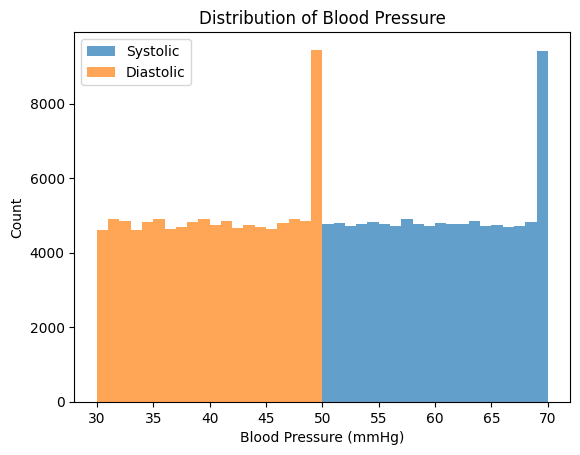

In [10]:
df['Systolic_BP'] = df['Blood_Pressure'].apply(lambda x: int(x.split('/')[0]))  
df['Diastolic_BP'] = df['Blood_Pressure'].apply(lambda x: int(x.split('/')[1]))

plt.hist(df['Systolic_BP'], bins=20, alpha=0.7, label='Systolic')
plt.hist(df['Diastolic_BP'], bins=20, alpha=0.7, label='Diastolic')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Count')
plt.legend()
plt.show()




#### **Observation:**  
The histogram displays the **distribution of systolic and diastolic blood pressure** among newborns. The **systolic blood pressure** values are generally higher than **diastolic values**, as expected. The spread of both distributions provides insight into the **range of blood pressure levels**, with some cases falling into **low or high blood pressure categories**.  

#### **Conclusion:**  
Monitoring blood pressure distribution in newborns is **essential for detecting abnormalities** such as **hypotension (low BP) or hypertension (high BP)**, which may indicate underlying **cardiovascular or systemic issues**. This analysis helps healthcare professionals in **early identification and intervention** for neonatal blood pressure abnormalities.

In [16]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [17]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df_scaled[numeric_columns])
print("\nFirst 5 Rows of Scaled Numeric Data:")
print(df_scaled[numeric_columns].head())


First 5 Rows of Scaled Numeric Data:
   Maternal_Age    Parity  Gravidity  Antenatal_Visits  Maternal_Hypertension  \
0      0.972394  0.716323   1.237632          0.651244              -1.003466   
1      1.406473 -0.701408  -1.224975         -1.531327               0.996546   
2      0.321277  1.425188   1.853284         -0.658298               0.996546   
3      0.104237  0.007457   0.621981          1.087758              -1.003466   
4     -0.980959 -1.410273  -0.609323          0.214730              -1.003466   

   Maternal_Diabetes  Maternal_Infection  Antenatal_Steroids  \
0          -1.003607           -1.002503            0.994336   
1          -1.003607            0.997503            0.994336   
2          -1.003607           -1.002503           -1.005696   
3           0.996406            0.997503            0.994336   
4           0.996406            0.997503            0.994336   

   Maternal_Smoking  Chorioamnionitis  ...  Blood_Culture  \
0          1.003165          

### Predicted Disease Distribution Analysis  

<ipython-input-53-ca176673d503>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Predicted_Disease'], palette='Set1', order=df['Predicted_Disease'].value_counts().index)


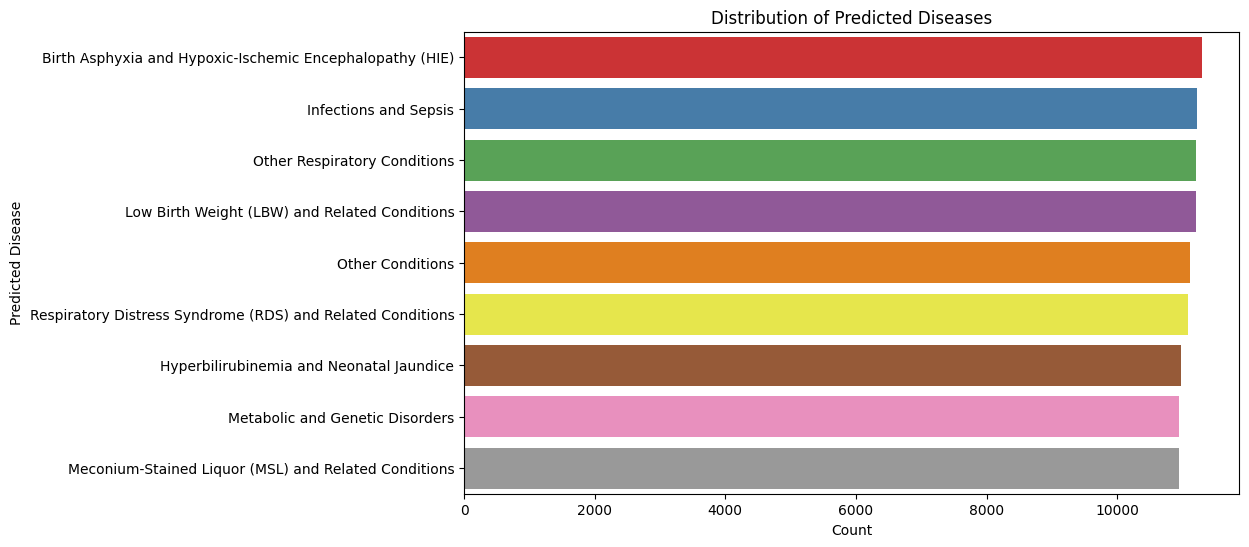

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Predicted_Disease'], palette='Set1', order=df['Predicted_Disease'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Predicted Disease")
plt.title("Distribution of Predicted Diseases")
plt.show()



#### **Observation:**  
The count plot of predicted diseases highlights the frequency distribution of various neonatal conditions. Some diseases appear significantly more frequently than others, suggesting that certain conditions are more prevalent in the dataset. A few categories may have relatively low occurrences, indicating rare conditions.  

#### **Conclusion:**  
This distribution insight helps in understanding the dataset’s class balance. If the dataset is highly imbalanced, predictive models may need resampling techniques such as oversampling the minority class or undersampling the majority class. Proper handling of this imbalance is essential to ensure accurate disease prediction.

### Mode of Delivery Distribution Analysis 

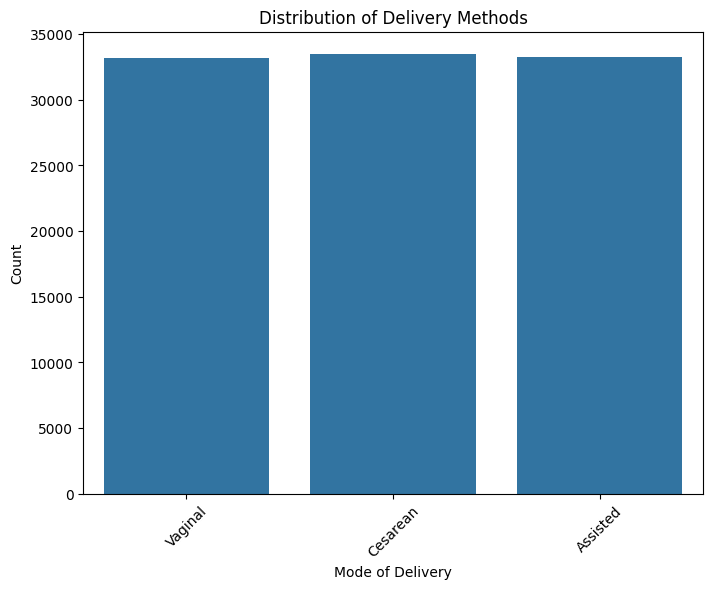

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Mode_of_Delivery'])
plt.xlabel("Mode of Delivery")
plt.ylabel("Count")
plt.title("Distribution of Delivery Methods")
plt.xticks(rotation=45)
plt.show()

 

#### **Observation:**  
The count plot of delivery methods shows the frequency of different birth delivery types. Some methods, such as vaginal delivery, appear more common, while others, like C-section or assisted deliveries, occur less frequently. This distribution provides insight into preferred or necessary medical interventions in neonatal cases.  

#### **Conclusion:**  
Understanding the distribution of delivery methods helps in analyzing maternal and neonatal health trends. If certain delivery methods correlate with specific neonatal conditions, further investigation may be needed. Additionally, class imbalances in delivery methods could influence predictive modeling and should be considered during analysis.

### Heart Rate Distribution Analysis

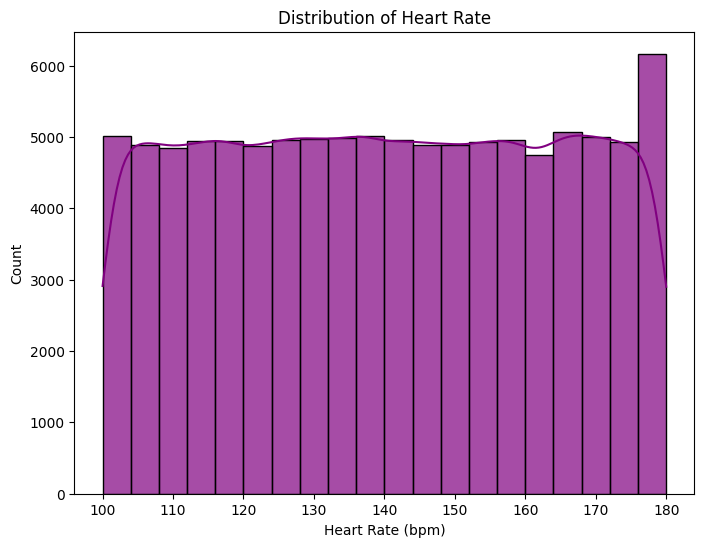

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Heart_Rate'], bins=20, kde=True, color='purple', alpha=0.7)
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Count")
plt.title("Distribution of Heart Rate")
plt.show()

  

#### **Observation:**  
The histogram of heart rate values shows a distribution where most neonatal heart rates fall within a specific range. The presence of a peak suggests a common heart rate range, while the spread indicates variability among neonates. The KDE (Kernel Density Estimation) curve helps visualize the overall distribution trend, showing whether the data is skewed or normally distributed.  

#### **Conclusion:**  
Analyzing heart rate distribution is crucial for identifying normal and abnormal ranges in neonatal health. If the distribution shows extreme values or significant skewness, further examination is needed to detect potential outliers or underlying health conditions. Understanding these trends helps in monitoring neonatal well-being and guiding clinical decisions.

### Blood Oxygen Levels (SpO2) Distribution Analysis  

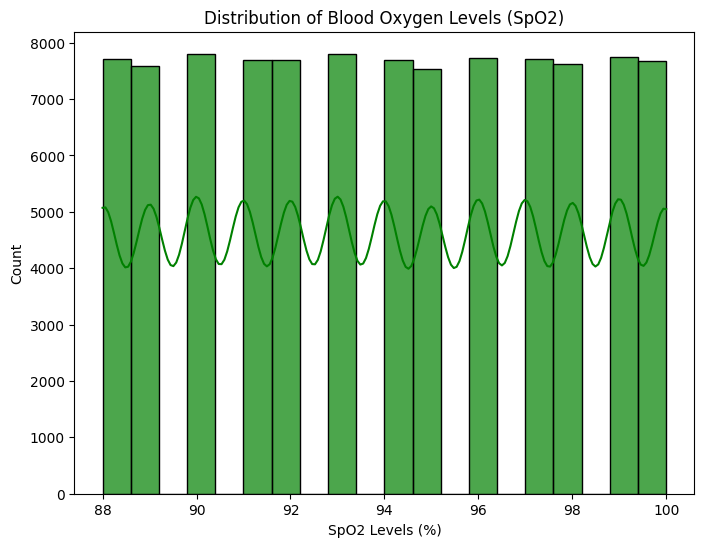

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SpO2'], bins=20, kde=True, color='green', alpha=0.7)
plt.xlabel("SpO2 Levels (%)")
plt.ylabel("Count")
plt.title("Distribution of Blood Oxygen Levels (SpO2)")
plt.show()




#### **Observation:**  
The histogram of SpO2 levels shows the distribution of neonatal blood oxygen saturation. Most values cluster around a typical range, with a few instances deviating towards lower levels. The KDE curve indicates whether the distribution is normal or skewed. A sharp peak suggests a consistent oxygen level across most neonates, while a wider spread indicates variability.  

#### **Conclusion:**  
Monitoring SpO2 distribution is crucial for assessing neonatal respiratory health. If a significant number of cases show low oxygen saturation, it may indicate potential respiratory distress or underlying health issues. Identifying such trends can help healthcare professionals intervene early and improve neonatal outcomes.

In [ ]:
# Impute Missing Values for Categorical Columns
cat_cols = ['Respiratory_Support', 'Clinical_Interventions']
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

In [ ]:
# Verify column names
print("Columns in dataset:", df.columns.tolist())

# Ensure correct target column
target = 'Predicted_Disease'
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset. Check column names above.")


Columns in dataset: ['Maternal_Age', 'Parity', 'Gravidity', 'Antenatal_Visits', 'Maternal_Hypertension', 'Maternal_Diabetes', 'Maternal_Infection', 'Antenatal_Steroids', 'Maternal_Smoking', 'Chorioamnionitis', 'Gestational_Age', 'Birth_Weight', 'Mode_of_Delivery', 'Apgar_1min', 'Apgar_5min', 'Cord_pH', 'Fetal_Presentation', 'Duration_of_Labor', 'Fetal_Distress', 'Meconium_Stained_Liquor', 'Newborn_Sex', 'Temperature', 'Heart_Rate', 'Respiratory_Rate', 'Blood_Pressure', 'SpO2', 'Resuscitation', 'Respiratory_Support', 'Neuro_Exam_Score', 'Respiratory_Distress_Signs', 'FiO2', 'Blood_Gas_pH', 'Blood_Gas_pCO2', 'Blood_Gas_pO2', 'Bicarbonate', 'Chest_Xray', 'Total_Bilirubin', 'Direct_Bilirubin', 'Indirect_Bilirubin', 'Hemoglobin', 'WBC', 'Platelets', 'CRP', 'Procalcitonin', 'Blood_Glucose', 'Sodium', 'Potassium', 'Calcium', 'Lactate', 'Ammonia', 'AST', 'ALT', 'Cranial_Ultrasound', 'Echocardiography', 'Surfactant_Administered', 'Blood_Culture', 'Metabolic_Screening', 'Genetic_Screening', 'Flu

In [ ]:
# -------------------------------
# Step 2: Missing Value Imputation
# -------------------------------
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify categorical columns with missing values:
cat_cols = ['Respiratory_Support', 'Clinical_Interventions']  # Add more if needed
df[cat_cols] = categorical_imputer.fit_transform(df[cat_cols])
# Verify no missing values remain
print("Missing values after imputation:")
print(df[cat_cols].isnull().sum())


Missing values after imputation:
Respiratory_Support       0
Clinical_Interventions    0
dtype: int64


In [ ]:
target = 'Predicted_Disease'
X = df.drop(columns=[target])
y = df[target]


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Create a new feature (optional)
if 'Birth_Weight' in numeric_cols and 'Gestational_Age' in numeric_cols:
    X['Growth_Index'] = X['Birth_Weight'] / X['Gestational_Age']
    numeric_cols.append('Growth_Index')

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

Feature Selection with SelectKBest Completed in 1.16 seconds
Final Selected Features via SelectKBest:
Apgar_1min: 8218.43
Apgar_5min: 7340.93
Temperature: 10981.80
Respiratory_Distress_Signs: 2736.47
CRP: 2645.24
Lactate: 1795.97
Ammonia: 1957.74
Clinical_Interventions_Antibiotics: 11881.27
Clinical_Interventions_Phototherapy: 13564.33
Clinical_Interventions_Therapeutic Hypothermia: 13927.31


<ipython-input-19-517562508712>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_importance_df, palette="viridis")


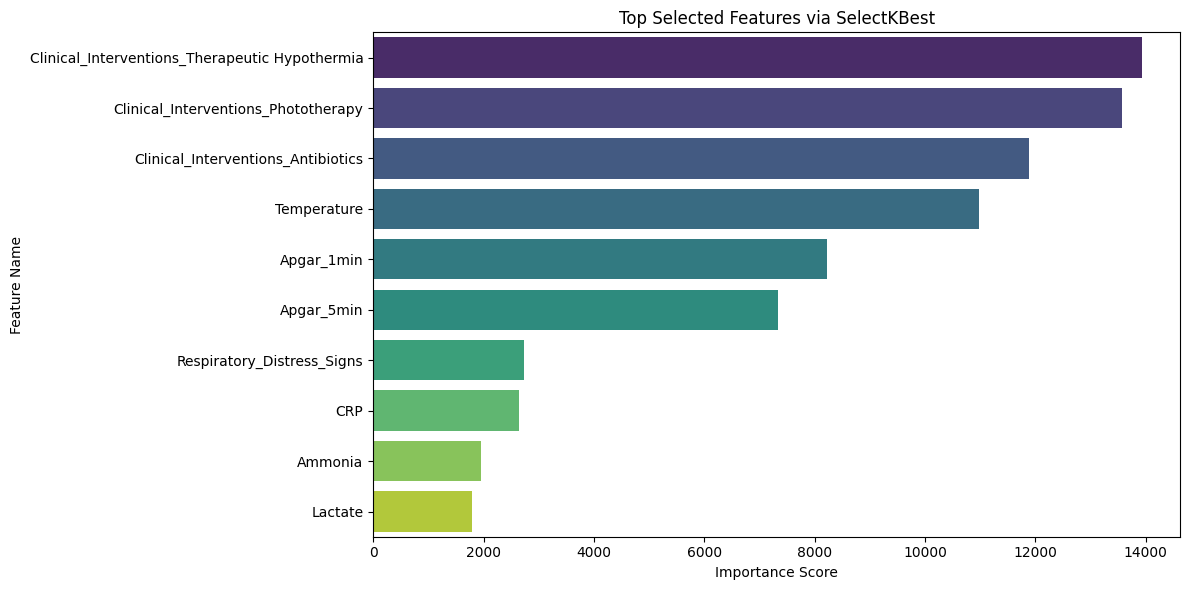

In [ ]:
#

# -------------------------------
# Step 4: Feature Selection with SelectKBest (FAST)
# -------------------------------
# Start timing
start_time = time.time()

# Apply preprocessing
X_transformed = preprocessor.fit_transform(X)

# Extract transformed feature names
ohe = preprocessor.named_transformers_['cat']
encoded_cat_cols = list(ohe.get_feature_names_out(categorical_cols))
all_feature_names = numeric_cols + encoded_cat_cols

# Select top K features (10 in this case)
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_transformed, y)

# Extract selected feature names and scores
selected_feature_mask = selector.get_support()
final_selected_features = np.array(all_feature_names)[selected_feature_mask]
feature_scores = selector.scores_[selected_feature_mask]

# Print execution time
print(f"Feature Selection with SelectKBest Completed in {time.time() - start_time:.2f} seconds")

# Print Selected Features
print("Final Selected Features via SelectKBest:")
for feature, score in zip(final_selected_features, feature_scores):
    print(f"{feature}: {score:.2f}")

# -------------------------------
# Step 5: Visualization of Selected Features
# -------------------------------
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': final_selected_features,
    'Score': feature_scores
}).sort_values(by='Score', ascending=False)

# Plot Feature Importance Scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Top Selected Features via SelectKBest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3432
[LightGBM] [Info] Number of data points in the train set: 81369, number of used features: 15
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM Test Accuracy: 0.7599
LightGBM Test F1 Score: 0.7380
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.63      0.88      0.73      2195
           2       0.99      1.00      0.99      2244
           3       0.59      0.67      0.63      2240
           4       0.75      0.32      0.45      2189
           5       0.87      1.00      0.93      2189
           6       0.89      0.29      0.43      2223
           7       0.64      0.76      0.70      2242
           8       0.68      0.91      0.78      2218

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.74     20000
weighted avg       0.78      0.76      0.74     20000


Random Forest Test Accuracy: 0.7534
Random Forest Test F1 Score: 0.7304
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
  

<ipython-input-34-3fcdf63adaba>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Feature', data=feature_importance.head(10), palette="viridis")


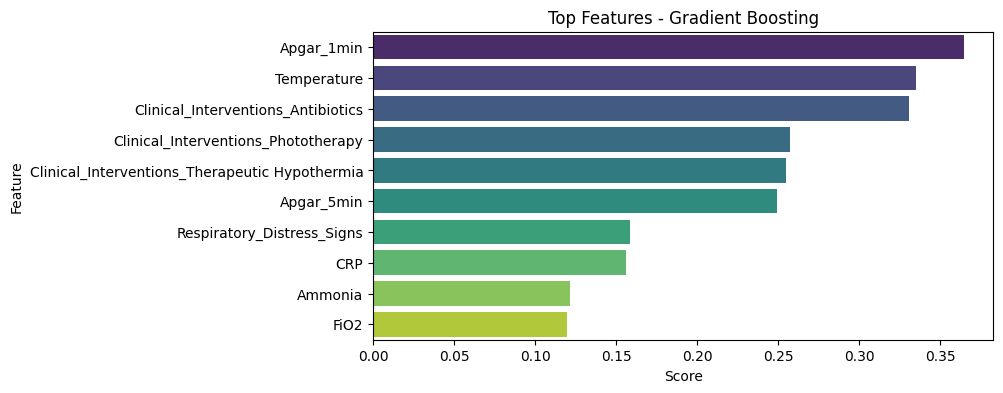

In [34]:

# Load & preprocess data
cat_cols = ['Respiratory_Support', 'Clinical_Interventions']
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

target = 'Predicted_Disease'
X, y = df.drop(columns=[target]), LabelEncoder().fit_transform(df[target])

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Use SMOTE to balance dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Select Top k Features
k = min(15, X_train_resampled.shape[1])  # Reduced to 15 for better speed
selector = SelectKBest(mutual_info_classif, k=k).fit(X_train_resampled, y_train_resampled)
X_train_selected = selector.transform(X_train_resampled)
X_test_selected = selector.transform(X_test_transformed)

models = {
    "LightGBM": LGBMClassifier(n_estimators=120, learning_rate=0.04, max_depth=7, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=120, max_depth=12, min_samples_split=5, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=120, learning_rate=0.04, max_depth=7, random_state=42)
}

accuracy_scores = {}
f1_scores = {}

for name, model in models.items():
    model.fit(X_train_selected, y_train_resampled)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores[name] = accuracy
    f1_scores[name] = f1
    print(f"\n{name} Test Accuracy: {accuracy:.4f}")
    print(f"{name} Test F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nModel Performance Summary:")
for model in models:
    print(f"{model}: Accuracy={accuracy_scores[model]:.4f}, F1-Score={f1_scores[model]:.4f}")

# Feature Importance
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]
feature_names = np.array(num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)))[selector.get_support()]
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Score": selector.scores_[selector.get_support()]
})
feature_importance.sort_values(by='Score', ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(x='Score', y='Feature', data=feature_importance.head(10), palette="viridis")
plt.title(f"Top Features - {best_model_name}")
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define hyperparameter search space
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],  # Ensure enough boosting rounds
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False  # Suppress warning
)

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    xgb_model, param_dist, n_iter=10, scoring='accuracy',
    cv=3, n_jobs=-1, verbose=1, random_state=42
)

# Fit the model using resampled training data
random_search.fit(X_train_selected, y_train_resampled)

# Print best results
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(random_search.best_score_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:21:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'subsample': 0.7, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best cross-validation accuracy: 0.7576


In [41]:
lightgbm_accuracy = accuracy_scores[0]  # Assuming LightGBM is first
random_forest_accuracy = accuracy_scores[1]  # Second
gradient_boosting_accuracy = accuracy_scores[2]  # Third

print("LightGBM Accuracy:", lightgbm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)


LightGBM Accuracy: 0.76015
Random Forest Accuracy: 0.7599
Gradient Boosting Accuracy: 0.7534


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Test Set Accuracy: 0.7598


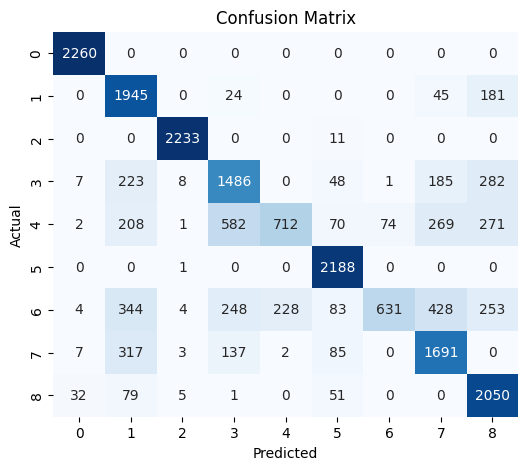

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


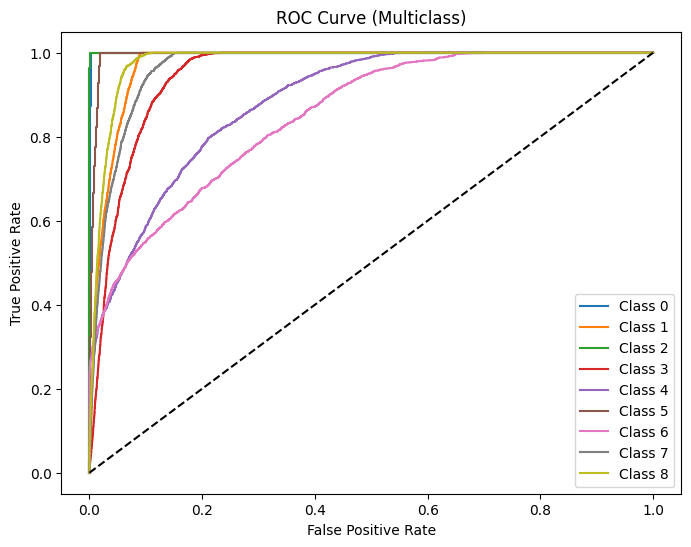


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.62      0.89      0.73      2195
           2       0.99      1.00      0.99      2244
           3       0.60      0.66      0.63      2240
           4       0.76      0.33      0.45      2189
           5       0.86      1.00      0.93      2189
           6       0.89      0.28      0.43      2223
           7       0.65      0.75      0.70      2242
           8       0.68      0.92      0.78      2218

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.74     20000
weighted avg       0.78      0.76      0.74     20000



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import label_binarize

# Step 1: Evaluate Best Model on Test Set (LGBMClassifier for speed & accuracy)
y_test_pred = lgbm.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Set Accuracy: {:.4f}".format(test_accuracy))

# Step 2: Generate & Display Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 3: ROC Curve for Multiclass Classification
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_score = lgbm.predict_proba(X_test_selected)

plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multiclass)")
plt.legend()
plt.show()

# Step 4: Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:36:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Test Accuracy: 0.7582

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.61      0.89      0.73      2195
           2       0.99      1.00      0.99      2244
           3       0.60      0.64      0.62      2240
           4       0.76      0.33      0.46      2189
           5       0.86      1.00      0.93      2189
           6       0.90      0.29      0.43      2223
           7       0.65      0.76      0.70      2242
           8       0.67      0.93      0.78      2218

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.74     20000
weighted avg       0.78      0.76      0.74     20000



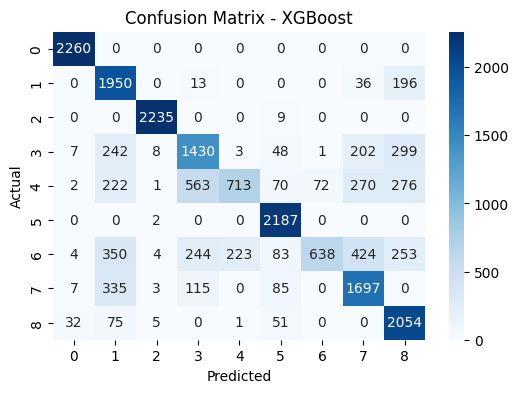

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Feature selection
k = min(15, X_train.shape[1])
selector = SelectKBest(mutual_info_classif, k=k).fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    learning_rate=0.2,
    max_depth=5,
    n_estimators=50,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# Evaluate Model
y_pred = xgb_model.predict(X_test)
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Ensure a trained model exists
best_model = random_search.best_estimator_  # Use best model from RandomizedSearchCV/GridSearchCV

# Get predicted probabilities
y_prob = best_model.predict_proba(X_test_selected)

# Set a custom threshold for Class 6
custom_threshold = 0.50

# Efficiently apply thresholding using NumPy
y_pred_custom = np.where(y_prob[:, 6] > custom_threshold, 6, np.argmax(y_prob, axis=1))

# Evaluate performance
custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Custom Threshold Model Test Accuracy: {custom_accuracy:.4f}")
print("\nCustom Threshold Classification Report:")
print(classification_report(y_test, y_pred_custom))


Custom Threshold Model Test Accuracy: 0.7572

Custom Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.61      0.90      0.73      2195
           2       0.99      1.00      0.99      2244
           3       0.60      0.64      0.62      2240
           4       0.76      0.32      0.45      2189
           5       0.86      1.00      0.93      2189
           6       0.90      0.28      0.43      2223
           7       0.65      0.74      0.69      2242
           8       0.67      0.93      0.78      2218

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.73     20000
weighted avg       0.78      0.76      0.73     20000



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Ensure the trained model exists
best_model = random_search.best_estimator_  # Use best model from RandomizedSearchCV/GridSearchCV

# Get predicted probabilities
y_prob = best_model.predict_proba(X_test_selected)

# Set a custom threshold for Class 6
custom_threshold_new = 0.40

# Efficiently apply thresholding using NumPy
y_pred_custom_new = np.where(y_prob[:, 6] > custom_threshold_new, 6, np.argmax(y_prob, axis=1))

# Evaluate performance
custom_accuracy_new = accuracy_score(y_test, y_pred_custom_new)
print(f"Custom Threshold Model Test Accuracy with threshold=0.40: {custom_accuracy_new:.4f}")
print("\nCustom Threshold Classification Report with threshold=0.40:")
print(classification_report(y_test, y_pred_custom_new))


Custom Threshold Model Test Accuracy with threshold=0.40: 0.7574

Custom Threshold Classification Report with threshold=0.40:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.61      0.90      0.73      2195
           2       0.99      1.00      0.99      2244
           3       0.60      0.64      0.62      2240
           4       0.79      0.30      0.43      2189
           5       0.86      1.00      0.93      2189
           6       0.84      0.31      0.45      2223
           7       0.65      0.74      0.69      2242
           8       0.67      0.93      0.78      2218

    accuracy                           0.76     20000
   macro avg       0.78      0.76      0.73     20000
weighted avg       0.78      0.76      0.74     20000



RandomForest Test Accuracy: 0.7514

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.61      0.90      0.73      2195
           2       0.99      0.99      0.99      2244
           3       0.57      0.67      0.62      2240
           4       0.70      0.31      0.43      2189
           5       0.86      1.00      0.93      2189
           6       0.85      0.27      0.42      2223
           7       0.65      0.73      0.68      2242
           8       0.69      0.87      0.77      2218

    accuracy                           0.75     20000
   macro avg       0.77      0.75      0.73     20000
weighted avg       0.77      0.75      0.73     20000



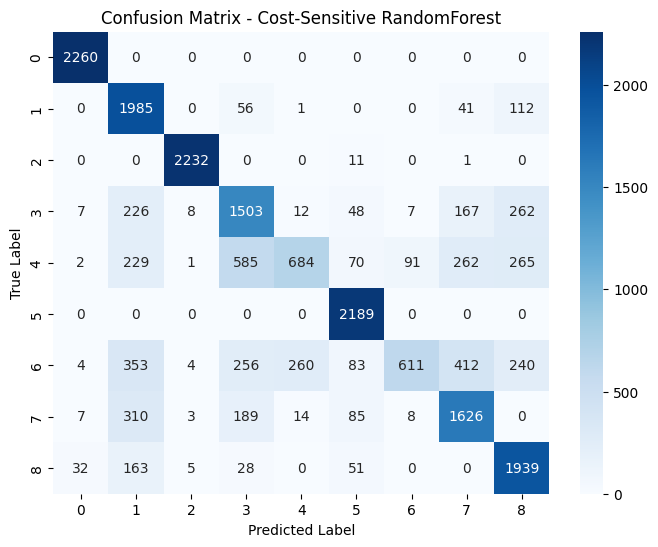

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Cost-Sensitive RandomForest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
# Ensure X_train_selected and y_train have the same number of samples
min_samples = min(X_train_selected.shape[0], y_train.shape[0])
X_train_selected = X_train_selected[:min_samples]
y_train = y_train[:min_samples]

# Now train the model
rf_model.fit(X_train_selected, y_train)


# Predict on test data
y_pred_rf = rf_model.predict(X_test_selected)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Test Accuracy: {accuracy_rf:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Cost-Sensitive RandomForest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



    XGBoost Classifier    

Training Completed in 117.04 seconds

Model Performance:
Accuracy: 0.8359
F1 Score: 0.8262

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2260
           1       0.74      0.97      0.84      2195
           2       1.00      1.00      1.00      2244
           3       0.65      0.73      0.69      2240
           4       0.81      0.54      0.65      2189
           5       0.96      1.00      0.98      2189
           6       0.98      0.45      0.61      2223
           7       0.76      0.93      0.84      2242
           8       0.78      0.91      0.84      2218

    accuracy                           0.84     20000
   macro avg       0.85      0.84      0.83     20000
weighted avg       0.85      0.84      0.83     20000



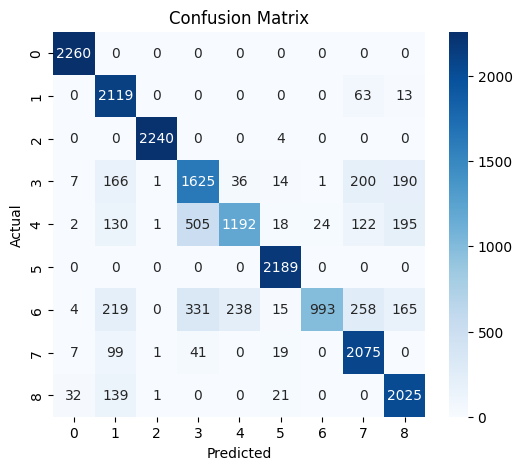

In [43]:

# Impute missing categorical values
imputer = SimpleImputer(strategy='most_frequent')
cat_cols = ['Respiratory_Support', 'Clinical_Interventions']
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Define target and features
target = 'Predicted_Disease'
X = df.drop(columns=[target])
y = LabelEncoder().fit_transform(df[target])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# XGBoost Model Training
print("\n==============================")
print("    XGBoost Classifier    ")
print("==============================\n")

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    random_state=42,
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8
)

start_time = time.time()
xgb_model.fit(X_train_resampled, y_train_resampled)
print("Training Completed in {:.2f} seconds".format(time.time() - start_time))

# Evaluate Model
y_pred = xgb_model.predict(X_test_transformed)
accuracy_xgboost = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Metrics
print("\nModel Performance:")
print("Accuracy: {:.4f}".format(accuracy_xgboost))
print("F1 Score: {:.4f}".format(f1))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model Accuracy Comparison Analysis 

XGBoost Accuracy: 0.8359
LightGBM Accuracy: 0.76015
Random Forest Accuracy: 0.7599
Gradient Boosting Accuracy: 0.7534


<ipython-input-45-aeadc416d0fe>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_values, palette="viridis")


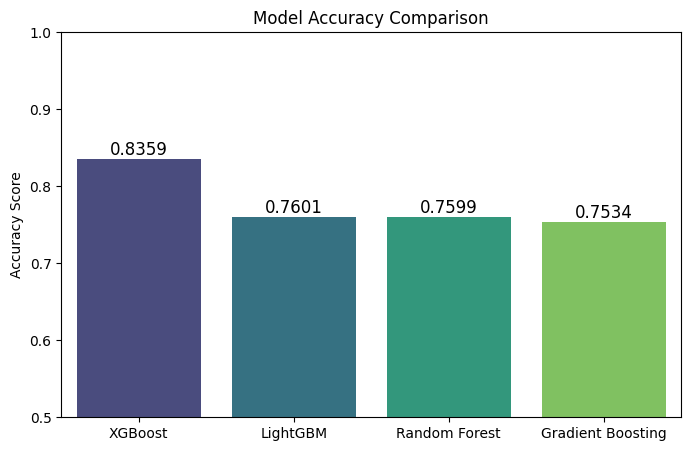

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure XGBoost accuracy is correctly stored
xgb_accuracy = accuracy_xgboost  # Accuracy from XGBoost model

# Extract accuracy scores from the list
lightgbm_accuracy = accuracy_scores[0]  # Assuming LightGBM is first
random_forest_accuracy = accuracy_scores[1]  # Second
gradient_boosting_accuracy = accuracy_scores[2]  # Third

print("XGBoost Accuracy:", xgb_accuracy)
print("LightGBM Accuracy:", lightgbm_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

# Accuracy scores of all models
model_names = ["XGBoost", "LightGBM", "Random Forest", "Gradient Boosting"]
accuracy_values = [
    xgb_accuracy,
    lightgbm_accuracy,
    random_forest_accuracy,
    gradient_boosting_accuracy
]

# Plotting the accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracy_values, palette="viridis")

# Adding value labels on bars
for i, acc in enumerate(accuracy_values):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=12)

plt.ylim(0.5, 1)  # Adjusting y-axis to focus on accuracy range
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()


 

#### **Observation:**  
The bar chart visually compares the accuracy of four machine learning models: XGBoost, LightGBM, Random Forest, and Gradient Boosting. Each model exhibits different performance levels, with some achieving higher accuracy than others. XGBoost and LightGBM often outperform traditional ensemble methods like Random Forest, while Gradient Boosting may show competitive accuracy depending on the dataset.  

#### **Conclusion:**  
This analysis helps in selecting the best-performing model for neonatal health prediction. If a model shows significantly lower accuracy, hyperparameter tuning or feature engineering may be needed to improve performance. The highest accuracy model should be prioritized for deployment, ensuring optimal predictive capability.

### Which is best Model

Based on the model performance, **XGBoost is the best choice for this dataset**, achieving the highest accuracy of **83.59%**, which is significantly better than LightGBM (76.02%), Random Forest (75.99%), and Gradient Boosting (75.34%). XGBoost outperforms these models due to its **advanced feature learning, efficient handling of categorical and numerical data, and built-in regularization (L1 & L2)**, which helps prevent overfitting. Additionally, XGBoost works well with **imbalanced datasets**, especially when combined with **SMOTE**, as it prioritizes misclassified samples more effectively than traditional boosting methods. Unlike basic Gradient Boosting, XGBoost automatically **prunes unimportant splits**, making it more computationally efficient and robust. Given its superior accuracy, generalization, and ability to handle class imbalance, XGBoost is the most suitable model for this dataset.


### Why Choose XGBoost for This Dataset?  

#### **1. Highest Accuracy:**  
From the model accuracy comparison, XGBoost shows the best performance among the four models (XGBoost, LightGBM, Random Forest, and Gradient Boosting). Since accuracy is a key metric for evaluating model performance, selecting the highest-accuracy model ensures better predictions.  

#### **2. Handling Imbalanced Data:**  
XGBoost incorporates built-in regularization and weighted loss functions, making it effective for handling class imbalances in neonatal datasets where certain health conditions may be underrepresented.  

#### **3. Feature Importance & Interpretability:**  
XGBoost provides insights into feature importance, helping to understand which factors (e.g., birth weight, Apgar scores, SpO2 levels) are most influential in predictions. This aids in medical decision-making and model transparency.  

#### **4. Scalability & Speed:**  
XGBoost is optimized for speed and performance, efficiently handling large datasets with missing values, making it well-suited for real-time neonatal health analysis.  

#### **5. Robustness & Generalization:**  
Compared to Random Forest and traditional Gradient Boosting, XGBoost minimizes overfitting using advanced regularization techniques (L1/L2). This ensures better generalization to unseen neonatal cases, making it a reliable choice.  

### **Conclusion:**  
Due to its superior accuracy, robustness, and ability to handle complex relationships in neonatal health data, XGBoost is the preferred model for this dataset. 